In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


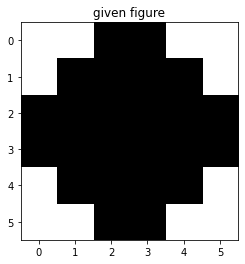

In [2]:
# Ugly rectangular matrix
#D = np.array([[1,0,1,1,0,1,1,0,0,1,1,0,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1],[1,0,1,0,1,1,0,1,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,1,1,1],[1,0,0,1,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,1,1,1],[1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,1,1,1],[1,0,1,1,0,1,0,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,1,1,1,1], [1,0,1,1,1,0,0,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,0,0,1],])


# Square matrix
D = np.array([[0,0,1,1,0,0], [0,1,1,1,1,0], [1,1,1,1,1,1], [1,1,1,1,1,1], [0,1,1,1,1,0], [0,0,1,1,0,0], ])
imshow(1-D,cmap='gray')
plt.title('given figure')
plt.show()

In [3]:
U,S,VT = svd(D)

In [4]:
U.shape, S.shape, VT.shape

((6, 6), (6,), (6, 6))

<img src='./img_src/decomposition matix.png'></img>

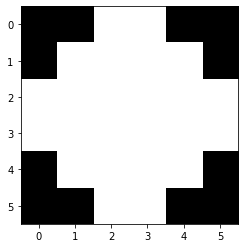

In [5]:
imshow(D,cmap='gray')
plt.show()

In [6]:
S= np.diag(S)

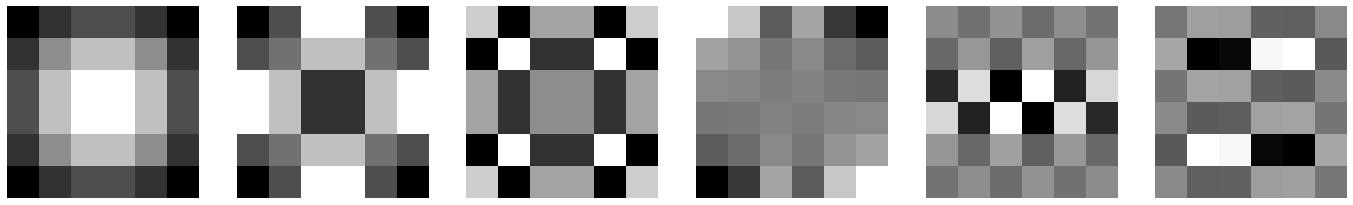

In [7]:
imgs = []
for i in range(len(S)): imgs.append(S.diagonal()[i] * np.outer(U[:,i],VT[i]) )

fig, axes = plt.subplots(figsize = (24,6), nrows = 1, ncols = len(D), sharex=True, sharey=True)
for num, ax in zip(range(len(D)), axes):
    ax.imshow(imgs[num], cmap='gray')
    ax.axis('OFF')
plt.show()

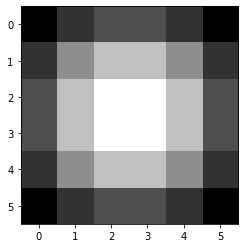

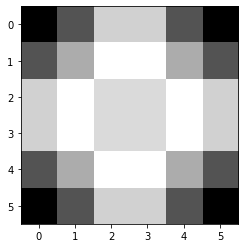

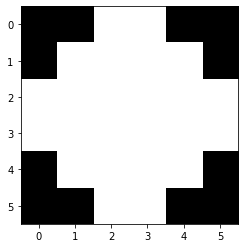

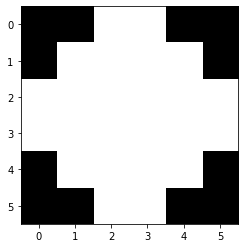

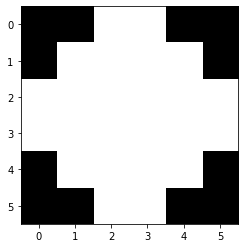

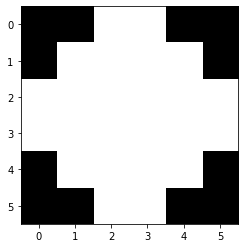

In [8]:
for i in range(1, len(U)+1):
    plt.figure()
    imshow( U[:,:i] @ S[0:i,:i] @ VT[:i,:], cmap='gray' )
    plt.show()

In [9]:
pd.DataFrame(
    [
        S.diagonal(),
        np.cumsum(S.diagonal()),
        (np.cumsum(S.diagonal()) / sum(S.diagonal()))*100
    ],
    index=['vaules of eign','cumulative sum','% of information'],columns=[1,2,3,4,5,6]).T

,vaules of eign,cumulative sum,% of information
1,4.493959e+00,4.493959,62.348980
2,1.603875e+00,6.097835,84.601074
3,1.109916e+00,7.207751,100.000000
4,1.932857e-16,7.207751,100.000000
5,5.162660e-17,7.207751,100.000000
6,1.881095e-17,7.207751,100.000000


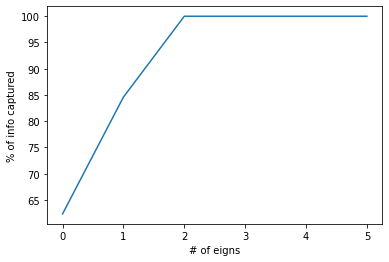

In [10]:
plt.plot( (np.cumsum(S.diagonal()) / sum(S.diagonal()))*100 )
plt.ylabel('% of info captured')
plt.xlabel('# of eigns')
plt.show()

In square matrix , we obtain orignal image almost 100% information with 3 eign_value and eign_vectors :)

`Note:`

any rectangular matrix can be represent as 3 smaller matrix  *_[Rotate]_  _[Stretch]_ _[Rotate]_*

- Rotate matix is parallel to Our Original Matrix. 
- Stretch matrix will preserve magnitude of Original Matix


<img src='./img_src/Singular-Value-Decomposition.png'> </img>

In [11]:

theta = np.array([np.pi/15, -np.pi/9, -np.pi/20])
Sigma = np.diag([3, 1, 0.5]) # scale x, then y, then z


# Three dimensional rotational matrix

# Rotation about x axis
Rx = np.array([[1, 0, 0],
               [0, np.cos(theta[0]), -np.sin(theta[0])],
               [0, np.sin(theta[0]), np.cos(theta[0])]])

# Rotation about y axis
Ry = np.array([[np.cos(theta[1]), 0, np.sin(theta[1])],
               [0, 1, 0],
               [-np.sin(theta[1]), 0, np.cos(theta[1])]])

# Rotation about z axis
Rz = np.array([[np.cos(theta[2]), -np.sin(theta[2]), 0],
               [np.sin(theta[2]), np.cos(theta[2]), 0],
               [0, 0, 1]])

# Rotate and scale
X = Rz @ Ry @ Rx @ Sigma

In [12]:
theta

array([ 0.20943951, -0.34906585, -0.15707963])

In [13]:
Sigma

array([[3. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 0.5]])

In [14]:
X

array([[ 2.78437034,  0.08278149, -0.18147596],
       [-0.44100094,  0.97722903, -0.0765087 ],
       [ 1.02606043,  0.19537308,  0.45957904]])

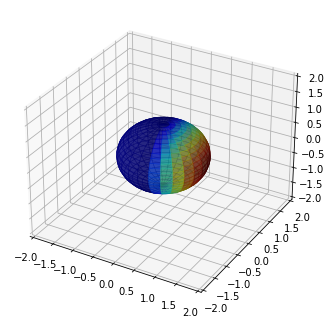

In [15]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121, projection='3d')

u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(0, np.pi, 100)

#print(u,v)

x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax1.plot_surface(x, y,z, alpha=0.6,linewidth=0.5,rcount=30,ccount=30,facecolors=plt.cm.jet(x))

ax1.set_xlim3d(-2, 2); ax1.set_ylim3d(-2, 2); ax1.set_zlim3d(-2, 2)

plt.show()

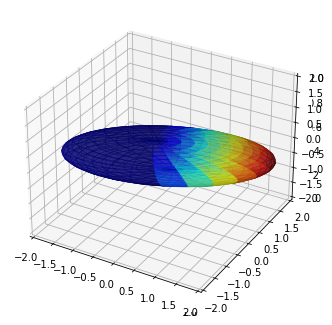

In [16]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(122, projection='3d')

xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        vec = [x[i,j], y[i,j], z[i,j]]
        vecR = X @ vec
        xR[i,j] = vecR[0]
        yR[i,j] = vecR[1]
        zR[i,j] = vecR[2]
        
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(xR, yR, zR, alpha=0.6,linewidth=0.5,facecolors=plt.cm.jet(x),rcount=30,ccount=30)

ax2.set_xlim3d(-2, 2); ax2.set_ylim3d(-2, 2); ax2.set_zlim3d(-2, 2)
plt.show()

`Note:`

    SVD is more than dimensionality reduction concept :)